In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from tqdm import tqdm

In [3]:
cb = Neuron(tmax=400)

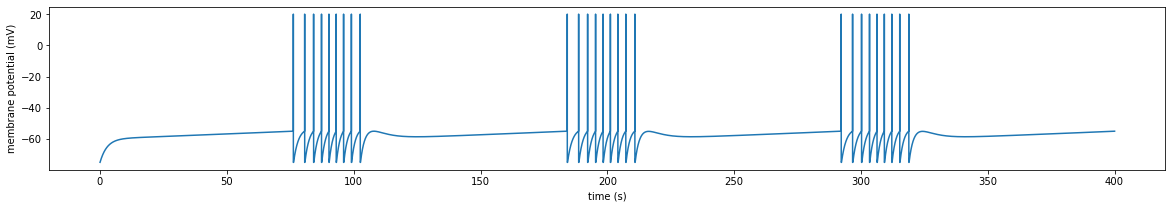

In [4]:
cb.run()
cb.disp(figsize=(20,3))

In [7]:
# add inhibitions
def run_inhibit(tau_stim, a_inh, interval=20, disp_i_inh=False):

    cb = Neuron(tmax=400)

    inhibit_moments = range(20, cb.tmax, interval)
    i_inh = 0
    i_inh_train =[]

    time_axis = np.arange(cb.dt, cb.tmax, cb.dt)
    for t in tqdm(time_axis):
        for t_st in inhibit_moments:
            if 0 <= np.abs(t - t_st) < cb.dt/2:
                i_inh += a_inh
        
        i_inh -= cb.dt * i_inh / tau_stim
        cb.step(i_ex=-i_inh)
        i_inh_train.append(i_inh)
        
    cb.disp(figsize=(20,3))
    if disp_i_inh:
        plt.figure(figsize=(20, 3))
        plt.plot(time_axis, i_inh_train, 'k')
        plt.show()

## tuning inhibition duration

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 83263.96it/s]


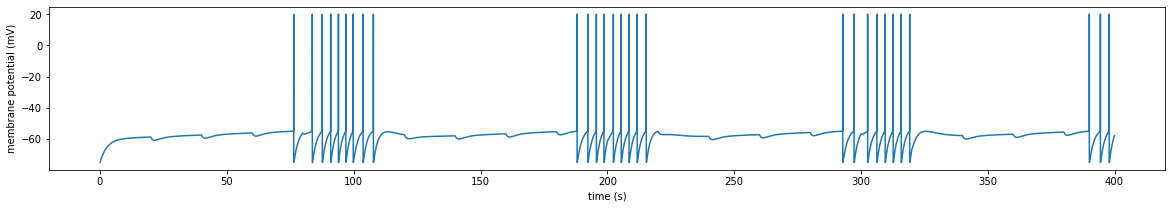

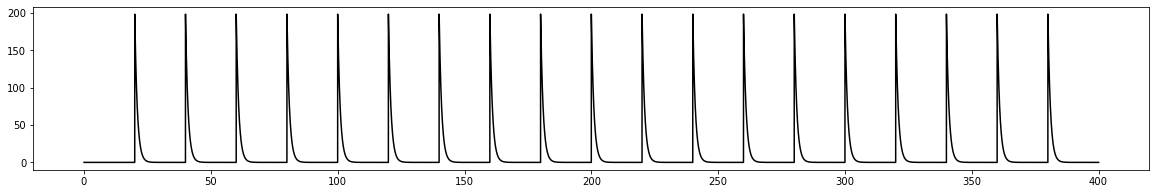

In [8]:
run_inhibit(tau_stim=1, a_inh=200, disp_i_inh=True)

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 85368.72it/s]


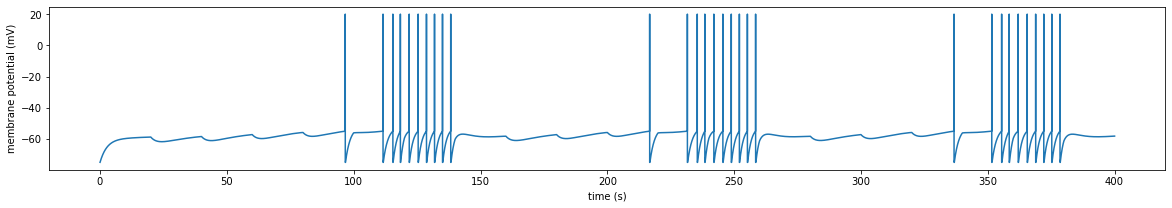

In [9]:
run_inhibit(tau_stim=10, a_inh=100)

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 86391.90it/s]


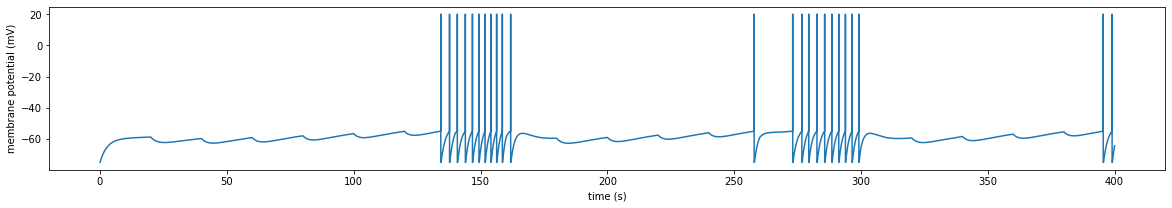

In [10]:
run_inhibit(tau_stim=20, a_inh=100)

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 86264.98it/s]


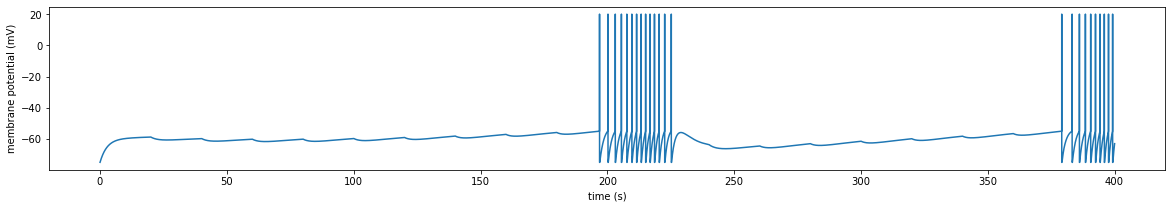

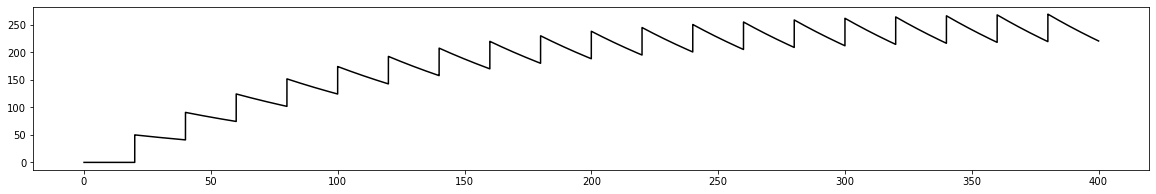

In [11]:
run_inhibit(tau_stim=100, a_inh=50, disp_i_inh=True)

## tuning interval

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 82532.27it/s]


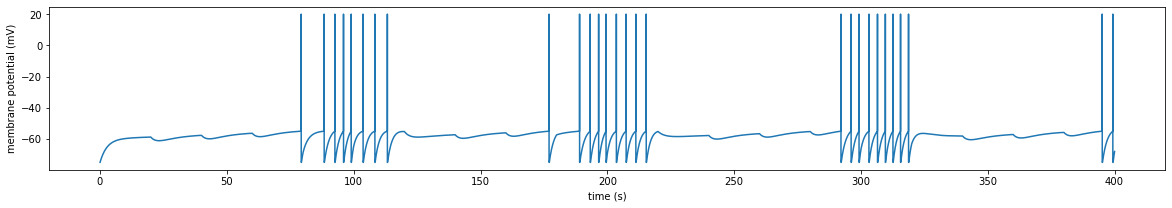

In [27]:
run_inhibit(tau_stim=5, a_inh=100, interval=20)

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 52616.28it/s]


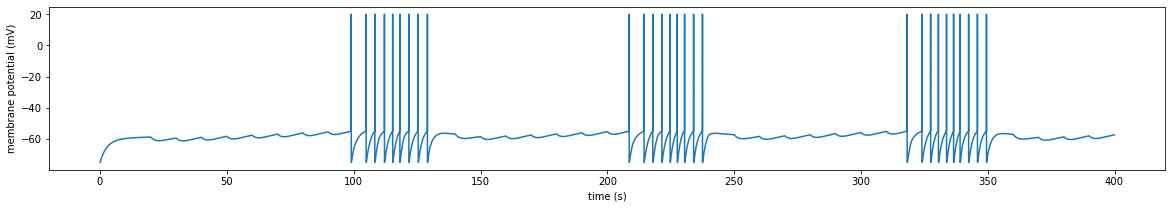

In [28]:
run_inhibit(tau_stim=5, a_inh=100, interval=10)

100%|████████████████████████████████████████| 39999/39999 [00:01<00:00, 30516.28it/s]


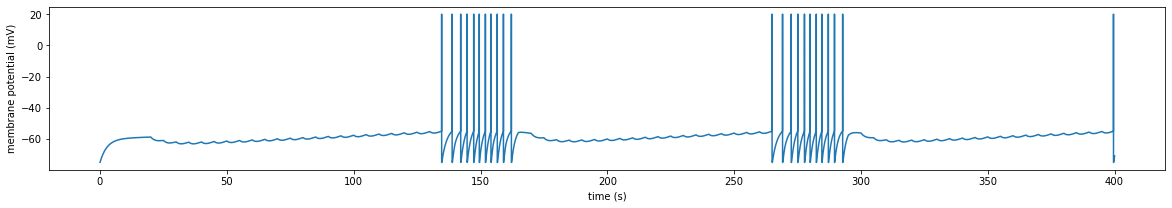

In [29]:
run_inhibit(tau_stim=5, a_inh=100, interval=5)

100%|████████████████████████████████████████| 39999/39999 [00:02<00:00, 19563.65it/s]


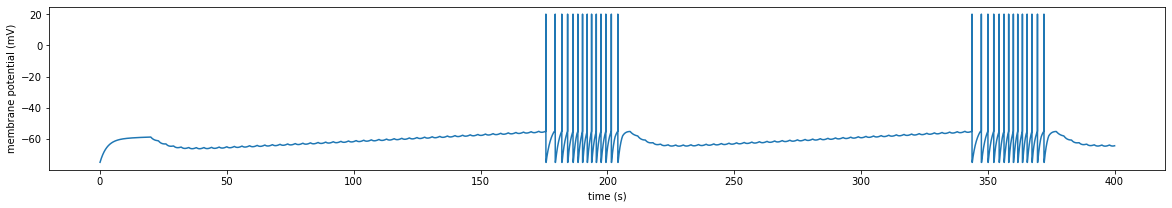

In [31]:
run_inhibit(tau_stim=5, a_inh=100, interval=3)

## change inhibition to excitation

100%|███████████████████████████████████████| 39999/39999 [00:00<00:00, 126666.85it/s]


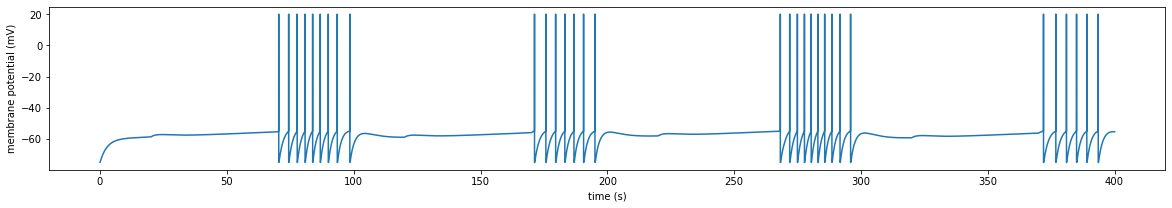

In [42]:
run_inhibit(tau_stim=5, a_inh=-50, interval=50)

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 84373.09it/s]


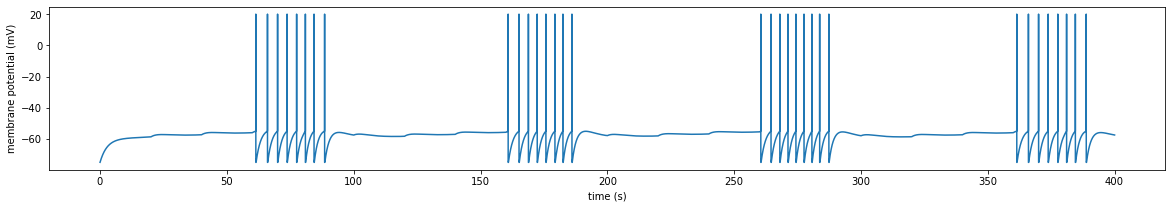

In [37]:
run_inhibit(tau_stim=5, a_inh=-50, interval=20)

100%|████████████████████████████████████████| 39999/39999 [00:00<00:00, 53375.28it/s]


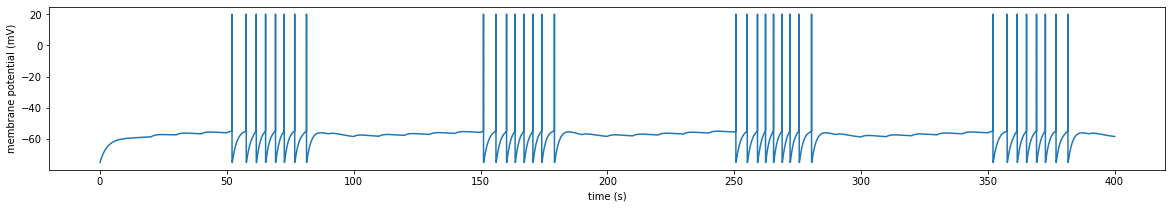

In [38]:
run_inhibit(tau_stim=5, a_inh=-50, interval=10)

100%|████████████████████████████████████████| 39999/39999 [00:02<00:00, 13477.06it/s]


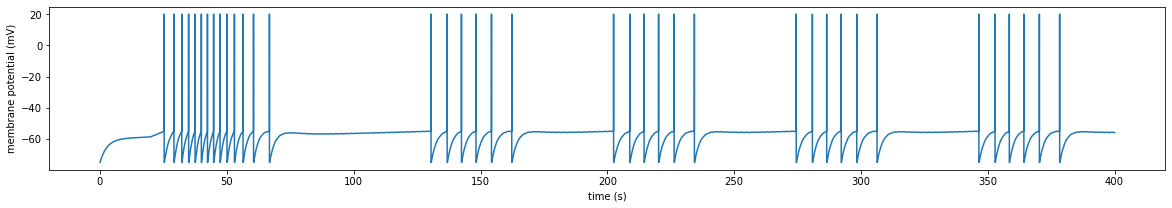

In [41]:
run_inhibit(tau_stim=5, a_inh=-50, interval=2)